\author{Christian Amstrup Petersen}
By Christian Amstrup Petersen,
Student number: 202104742
\appendix

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl

# Variables to adjust grid size
gridWidth = 10
gridHeight = gridWidth*1.26

# Resuable functions and variables

# Plots the given x- and y-coordinates
def plot(x,y):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    ax.plot(x,y)

# Plots multiple figures in the same plot/grid. Used for comparisson between a modified, and non-modified figure. If 'withLabels' is set to true, will include labels on each plot.
# The parameter for this function should then be: (pointValuesList: [[x1, y1, label1], [x2, y2, label2], ... [x_n, y_n, label_n]], withLabels: True)
def plotMultiple(pointValuesList, withLabels = False):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    for values in pointValuesList:
        if withLabels:
            ax.plot(values[0], values[1], label=values[2])
        else:
            ax.plot(values[0], values[1])
    ax.legend()

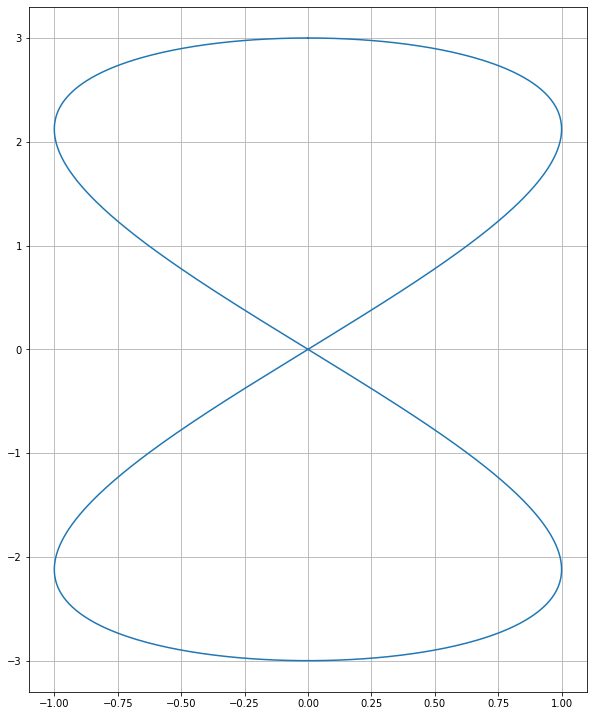

In [42]:
# Assignment A
n = 1000

def x(t):
    return 3*np.cos(t)
def y(t):
    return np.sin(2*t)

x_vec = np.vectorize(x)
y_vec = np.vectorize(y)

t = np.linspace(0, 2*np.pi, n)
# x,y = inf --- y,x = 8-tal
plot(y_vec(t), x_vec(t))

Theta:  [0.93727261]


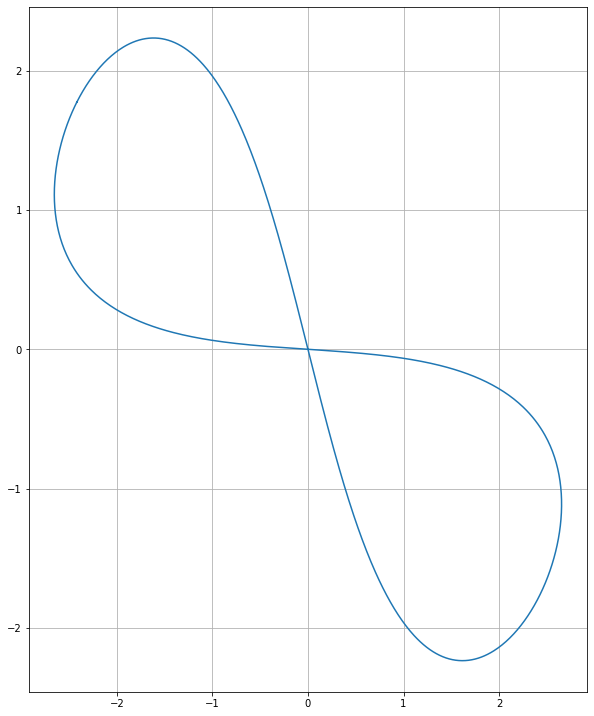

In [61]:
# Assignment B
rng = np.random.default_rng()
theta = rng.uniform(np.pi/5, 4*np.pi/5, 1)

def rotationMatrix(radians): 
    c, s = np.cos(radians), np.sin(radians)
    return np.array([[c, -s], [s, c]])

rot = rotationMatrix(theta[0])

v_y = y_vec(t)
v_x = x_vec(t)

xy = np.array((v_y.T, v_x.T))

xy_rot = rot @ xy

print("Theta: ", theta)
plot(xy_rot[0], xy_rot[1])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


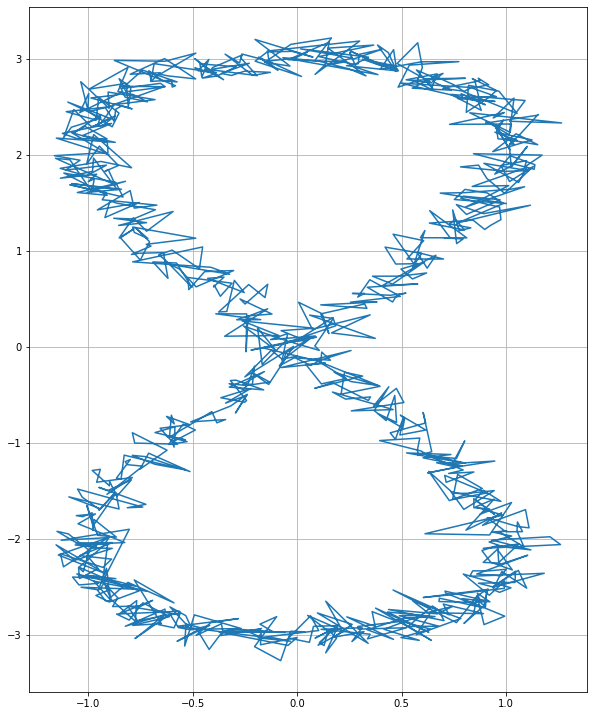

In [62]:
# Assignemnt C

n0 = 1000

ar = np.zeros((2, n0))

print(ar)

distortion = rng.normal(0.0, 0.1, (2, n)).T


t1 = np.linspace(0, 2*np.pi, n0)
y1 = y_vec(t1)
x1 = x_vec(t1)

xy1 = np.array((x1, y1)).T + distortion
A = xy1.T
plot(xy1T[1], xy1T[0])

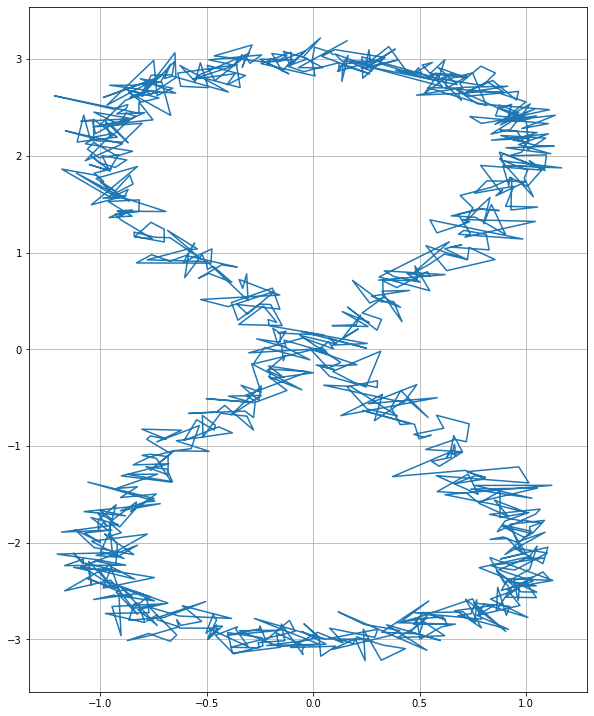

In [76]:
B = A - np.mean(A)
plot(B[1], B[0])


In [ ]:
# Assignment D

